# Project 3 - Data Visualization of Ford Go-Bike System
## by (Ebenezer Acquah)

Table of Content

- [Introduction](#intro)
-[Prelimary Investigation](#investigation)
- [Data Wrangling](#wrangling)
- [Feature Engineering](#engineering)
- [Univariate Exploration](#univariate)
- [Bivariate Exploration](#bivariate)
- [Multivariate Exploration](#multivariate)
- [Summary](#summary)

### <a id='intro'> Introduction</a>

> This dataset provides information about individual rides made in a bike-sharing system in the San Francisco Bay Area. The dataset has 183412 rows and 16 columns

### <a id='investigation'>Prelimary Investigation</a>

Import Libraries

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

# load
df = pd.read_csv("/home/eben-success/Desktop/Local/Udacity/Udacity/Udacity_Data_Analysis_Projects/Project 3/201902-fordgobike-tripdata.csv")


In [3]:
df_copy = df.copy()

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# check the number of rows and columns in the dataset
df.shape

(183412, 16)

In [6]:
# check tthe unique values in the target datasets (bike_share_for_all_trip)
df.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [8]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

From the summary above, there are 197 missing values in start_station_id, start_station_name, end_station_id, end_station_name and 8265 missing values in member_birth_year and member_gender.

In [9]:
df.duplicated().sum ()

0

## <a id ='wrangling'>Data Wrangling</a>

Checking for missing values 

In [10]:
# Find the percentage of missing values

(df.isna().sum() / df.shape[0]) * 100

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64

Fill missing values with the mode

In [11]:
for col in ['start_station_id', 'end_station_id', 'member_birth_year', 'member_gender' , 'end_station_name', 'start_station_name']:
    df[col] = df[col].fillna(df[col].mode()[0])
    
df['member_gender'] = df['member_gender'].fillna("Male")

#### Investigations made so far

>- Most of the entries have incorrect datatypes
>- Some columns have missing data

## <a id='engineering'>Feature Engineering</a>

Correcting Datatypes

In [12]:
# convert start_time and end_time to datetime format
df.start_time = pd.to_datetime(df. start_time)
df.end_time = pd.to_datetime(df.end_time)

# convert the start_station_id and end_stattion_id to strings
df.start_station_id = df.start_station_id.astype(str)

df.end_station_id = df.end_station_id.astype(str)

# convert the bike_id to string
df.bike_id = df.bike_id.astype(str)

# convert the user type and member_gender to categories
df.user_type = df.user_type.astype('category')

df.member_gender = df.member_gender.astype('category')

In [13]:
#checking to see if changes have been implemented
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183412 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183412 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

Fill the missing values with the mode

Recheck the percentage of missing values 

In [14]:
(df.isna().sum() / df.shape[0]) * 100

duration_sec               0.0
start_time                 0.0
end_time                   0.0
start_station_id           0.0
start_station_name         0.0
start_station_latitude     0.0
start_station_longitude    0.0
end_station_id             0.0
end_station_name           0.0
end_station_latitude       0.0
end_station_longitude      0.0
bike_id                    0.0
user_type                  0.0
member_birth_year          0.0
member_gender              0.0
bike_share_for_all_trip    0.0
dtype: float64

I will convert the duration_secs in seconds to duration_mins in minutes so that it would look more friendly. 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183412 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183412 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [16]:
df['duration_min'] = (df['duration_sec'] / 60)
df['duration_min'] = df['duration_min'].astype(int)

# Dropping the duration_sec columns

df.drop(['duration_sec'], axis=1, inplace=True)


Since the member_birth_year is given, I would calculate the member's present age

In [17]:
df['member_age'] = 2021 - df['member_birth_year']

# converting member age from float to int

df['member_age'] = df['member_age'].astype(int)

df.drop(columns=['member_birth_year'], inplace=True)

In [18]:
df['member_age'].describe()

count    183412.000000
mean         36.049653
std           9.908290
min          20.000000
25%          29.000000
50%          33.000000
75%          40.000000
max         143.000000
Name: member_age, dtype: float64

From the description above, the maximum age is 143, which is abnormal, I will drop ages which exceeds 100.

In [19]:
# Checking for ages abover 100 years
abnormal_ages = df.query('member_age > 100')
print("The number of members with ages greater than 100 are  ", abnormal_ages.shape[0])

The number of members with ages greater than 100 are   75


From the above inspection, there are 75 people whose ages are greater than 100.

In [20]:
# Drop ages greater than 100 years

df = df[df['member_age'] < 100]

Reformat the date into minutes, hours, days and month in order to generate more insights 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183337 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               183337 non-null  datetime64[ns]
 1   end_time                 183337 non-null  datetime64[ns]
 2   start_station_id         183337 non-null  object        
 3   start_station_name       183337 non-null  object        
 4   start_station_latitude   183337 non-null  float64       
 5   start_station_longitude  183337 non-null  float64       
 6   end_station_id           183337 non-null  object        
 7   end_station_name         183337 non-null  object        
 8   end_station_latitude     183337 non-null  float64       
 9   end_station_longitude    183337 non-null  float64       
 10  bike_id                  183337 non-null  object        
 11  user_type                183337 non-null  category      
 12  member_gender   

In [22]:
# Getting hours from start time
df['start_hour'] = df['start_time'] .dt.strftime('%H')

# Getting days from start time
df['start_day'] = df['start_time'] .dt.strftime('%A')

df['start_month'] = df['start_time'] .dt.strftime('%B')

In [23]:
df.start_month.unique()

array(['February'], dtype=object)

Based on the information above, all the trips were recored in February 2019

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183337 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               183337 non-null  datetime64[ns]
 1   end_time                 183337 non-null  datetime64[ns]
 2   start_station_id         183337 non-null  object        
 3   start_station_name       183337 non-null  object        
 4   start_station_latitude   183337 non-null  float64       
 5   start_station_longitude  183337 non-null  float64       
 6   end_station_id           183337 non-null  object        
 7   end_station_name         183337 non-null  object        
 8   end_station_latitude     183337 non-null  float64       
 9   end_station_longitude    183337 non-null  float64       
 10  bike_id                  183337 non-null  object        
 11  user_type                183337 non-null  category      
 12  member_gender   

In [25]:
# Checking station

num_stations = df['start_station_name'].nunique()

print("There are ", num_stations, " stations in the dataset")

There are  329  stations in the dataset


In [26]:
df.shape

(183337, 19)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183337 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               183337 non-null  datetime64[ns]
 1   end_time                 183337 non-null  datetime64[ns]
 2   start_station_id         183337 non-null  object        
 3   start_station_name       183337 non-null  object        
 4   start_station_latitude   183337 non-null  float64       
 5   start_station_longitude  183337 non-null  float64       
 6   end_station_id           183337 non-null  object        
 7   end_station_name         183337 non-null  object        
 8   end_station_latitude     183337 non-null  float64       
 9   end_station_longitude    183337 non-null  float64       
 10  bike_id                  183337 non-null  object        
 11  user_type                183337 non-null  category      
 12  member_gender   

### After the data wrangling, and feature engineering, 

>- There are 183337 rows and 19 columns in the dataset. <br><br>
>- start_station_id, end_station_id, bike_id have been converted from int to strings.<br><br>
>- The start_time has been broken into start_hour, start_day and start_month.<br><br>


## Univariate Exploratory Data Analysis

> In this session, I will explore  the duration_min, member's age and the start time from the dataset.

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

I willl start off with univariate distribution and visualize the relationship between variables.

Which age group rented the most

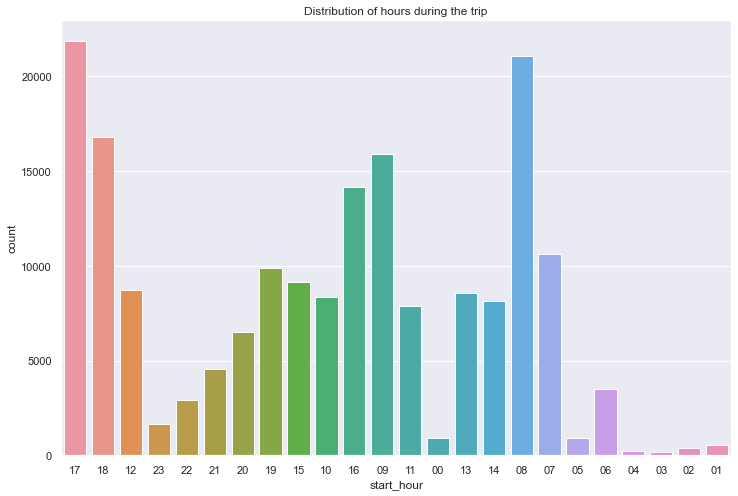

In [28]:
# Visualize hour of the day and it's respective trip

sn.set_theme(style='darkgrid')
plt.figure(figsize=[12,8])
plt.title("Distribution of hours during the trip")
sn.countplot(df['start_hour']);

The hours of 17, and 08 have the most bike rentals, with over 2000 trips.

Which day has the most trip

<AxesSubplot:title={'center':'Distribution of Day with the most Trip'}, xlabel='start_day', ylabel='count'>

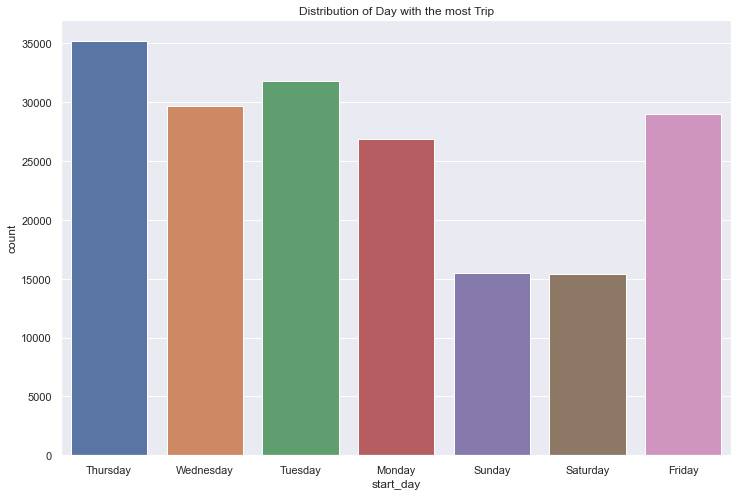

In [29]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=[12,8])
plt.title('Distribution of Day with the most Trip')
sn.countplot(df['start_day'])

From the chart above,  most people rented bikes on the Thursday. The total amount of bikes rented on the Thursday was 35000. This is followed by Tuesday, which amount a total of over 31000 rentals. On Friday,  a total amout of approximately 29000 rentals were made. The least of the rentals were made on Sunday and Saturday.

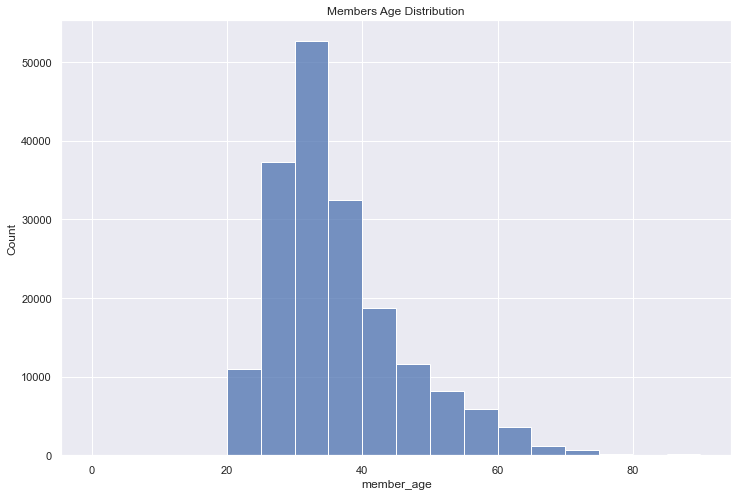

In [30]:
# Exploring the age:

bins = np.arange(0, df['member_age'].max() , 5)
plt.figure(figsize=[12,8])
plt.title("Members Age Distribution")
sn.histplot(df['member_age'], bins=bins);

Which duration range occurs most frequently 

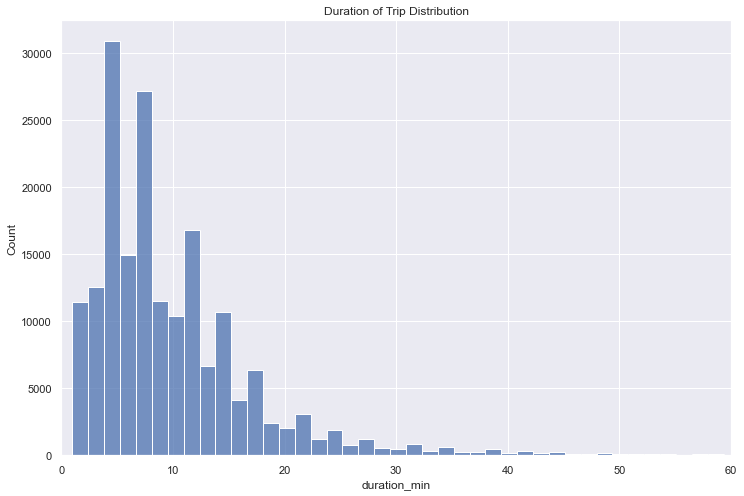

In [38]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=[12,8])
plt.xlim(0, 60)
plt.title("Duration of Trip Distribution")
sn.histplot(df['duration_min'], bins=1000);

From the chart above, most trips have duration less than 10 minutes

Who are the major users? Is it customers or subscribers?

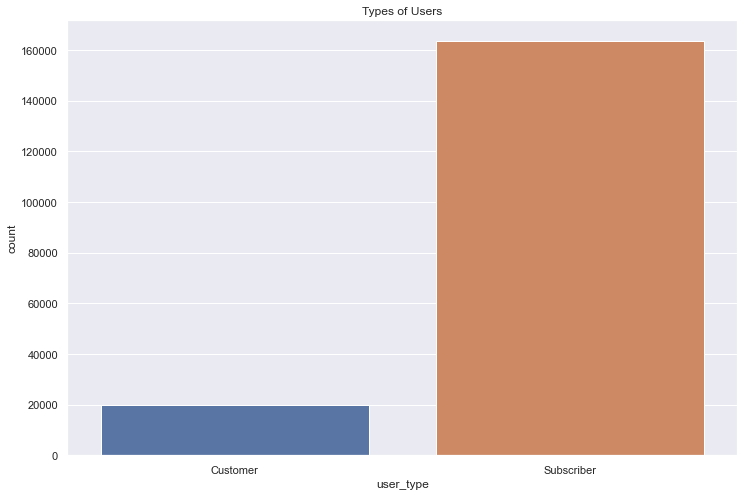

In [39]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=[12,8])
plt.title("Types of Users")
sn.countplot(df.user_type);

From the chart above, we can see that majority of the users are subscribers. They account to a little above 160000, while customers amount to only 2000.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>- The duration of trips take huge amount of values and is denser at the left. So, I looked at it in log transform and found that peak occurs at 600 seconds starting from 0 and then distribution starts to drop and does not regain any more peak value.

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>- With the year of birth, I got the recent ages of the users by subtracting their birth years from the 2022. Surprisingly, 75 users were above 100 years, which was abnormal.

>- I separated the start_time into days, hours and months for better insights in the data.

>- Most of the trip durations took less than 10 minutes. I think majority of the users needed the bikes for a short distance. 

>- Finally, I converted the seconds into minutes in order to make it easy fto work with.

### Unsual Analysis from the Univariate Analysis

## Bivariate Data Analysis

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

#### Which day of the week has the most average trips duration?

<AxesSubplot:title={'center':'Duration of trips during the Weekday'}, xlabel='start_day', ylabel='duration_min'>

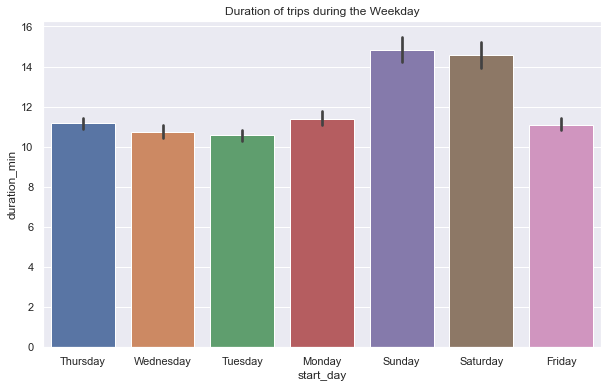

In [40]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=[10,6])
plt.title("Duration of trips during the Weekday")
sn.barplot(data=df, x = 'start_day', y='duration_min')

From the chart above, it can be deduced that most people hire bikes on the weekends (Sunday and Saturday).

#### Which the trip duration of each age group 

<AxesSubplot:title={'center':'Trips Durations among Age Group'}, xlabel='member_age', ylabel='duration_min'>

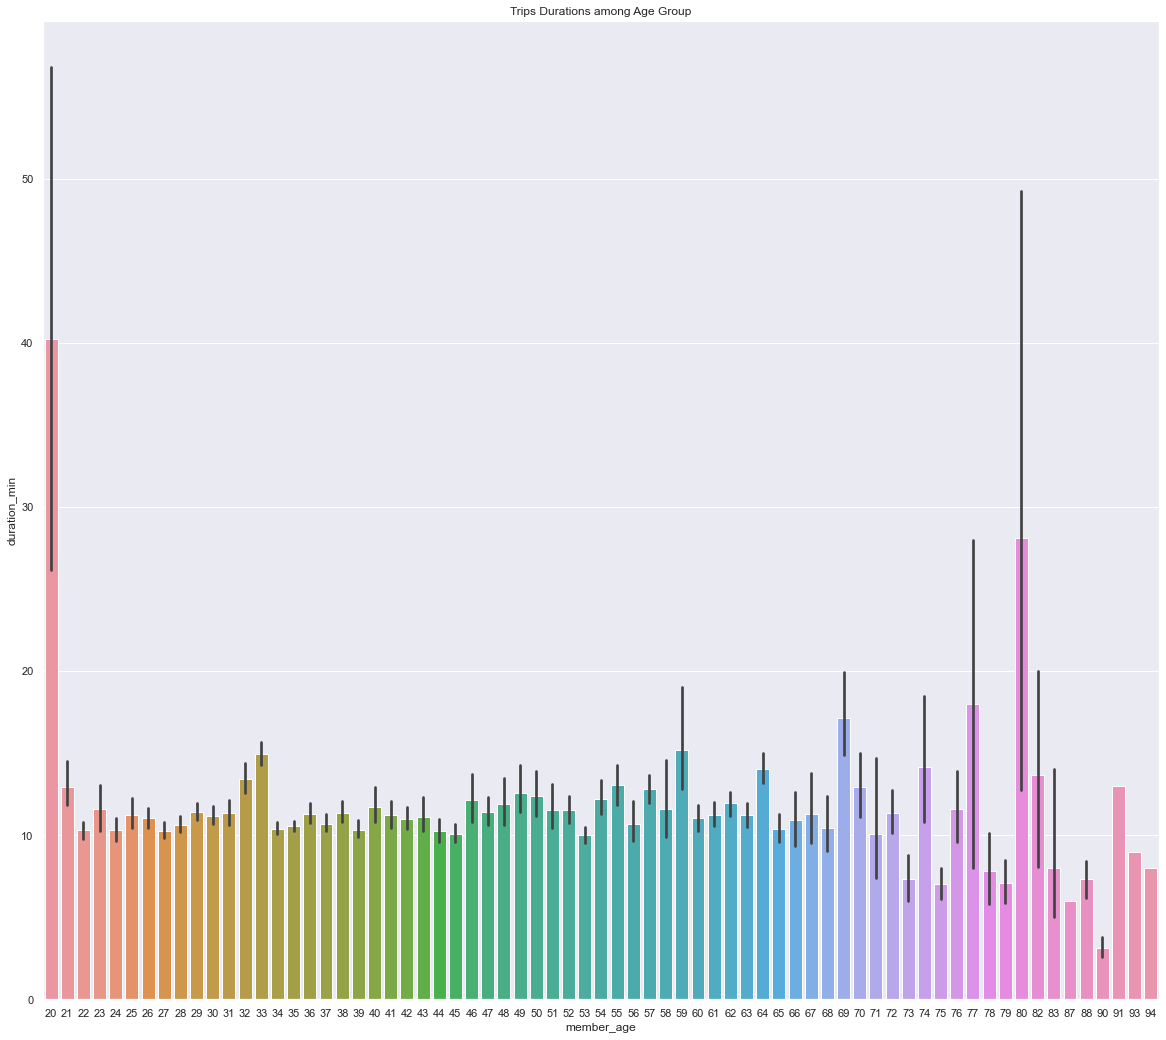

In [41]:
# Trip duration vs Age Group

sn.set_theme(style='darkgrid')
plt.figure(figsize=(20,18))
plt.title('Trips Durations among Age Group')
sn.barplot(data=df, x='member_age', y='duration_min')

Most age groups with largest average of trip duration are 21 and 77

#### User Counts by Gender

<AxesSubplot:title={'center':'User Count by Gender'}, xlabel='member_gender', ylabel='count'>

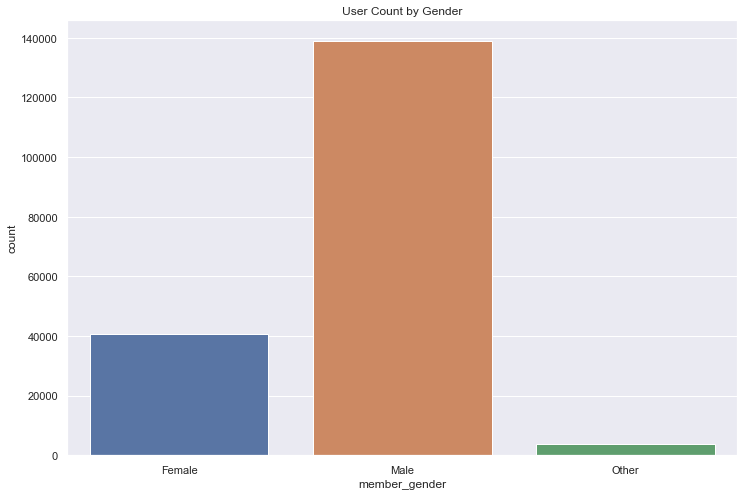

In [45]:
# Exploring user count by gender

sn.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
plt.title("User Count by Gender")
sn.countplot(x=df.member_gender)

Form the chart, most of the users are males

#### What isthe age range of different user types?

<AxesSubplot:title={'center':'Age Range Among Users'}, xlabel='user_type', ylabel='member_age'>

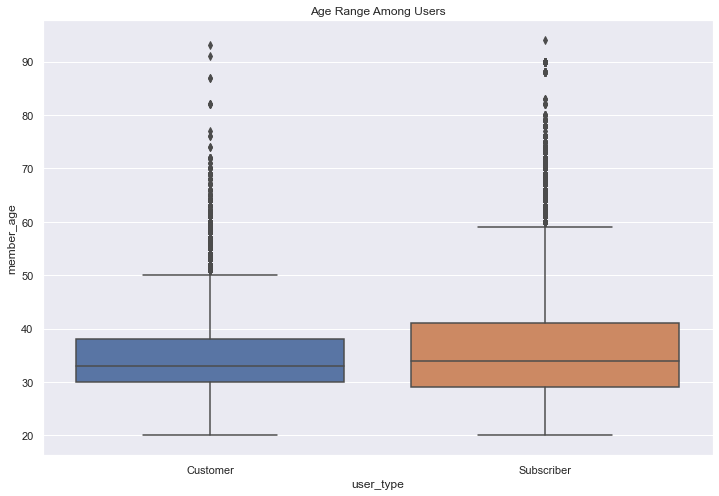

In [46]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
plt.title("Age Range Among Users")
sn.boxplot(data=df, x='user_type', y='member_age')

From the chart above, most the customers are between the ages of 30 and 39. While the age range of  majority of subscribers is 30 and 41 years. 

#### What is the age range of different genders?

<AxesSubplot:title={'center':'Age Vs Gender Relationship'}, xlabel='member_gender', ylabel='member_age'>

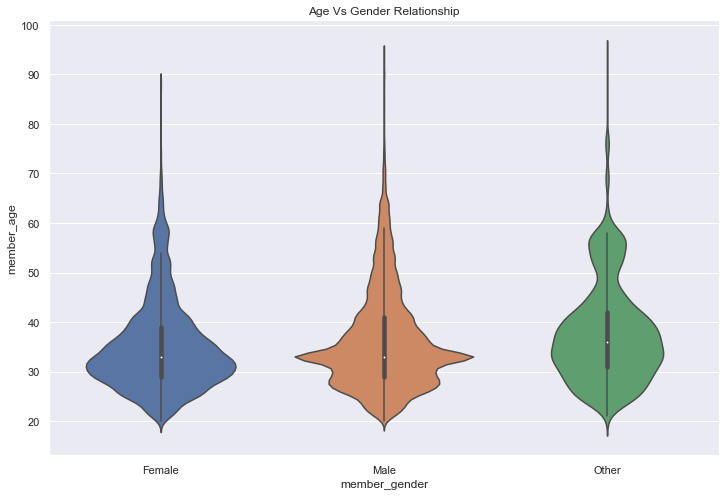

In [47]:
# Age range vs Gender

sn.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
plt.title("Age Vs Gender Relationship")
sn.violinplot(data=df, x='member_gender', y='member_age')

Both male and females age ranges have the same median age

#### How did the feature(s) of interest vary with other features in the dataset?


> The median ages of both male and females are identical. <br><br>
> Most people people to go for a bike trip  on the weekends: Majority of the bike trips occur on Sunday, followed by Saturday.  

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>- The age group with most average trips are 21 and 77 years. 
>- There is a vast difference in the number of subscribers and customers. 

## Multivariate Data Analysis

>- Create a graph consisting of tree or more variables to investigate the dataset



#### What is the relationship between Weekdays, Average Duration and User Gender?

<AxesSubplot:xlabel='start_day', ylabel='member_age'>

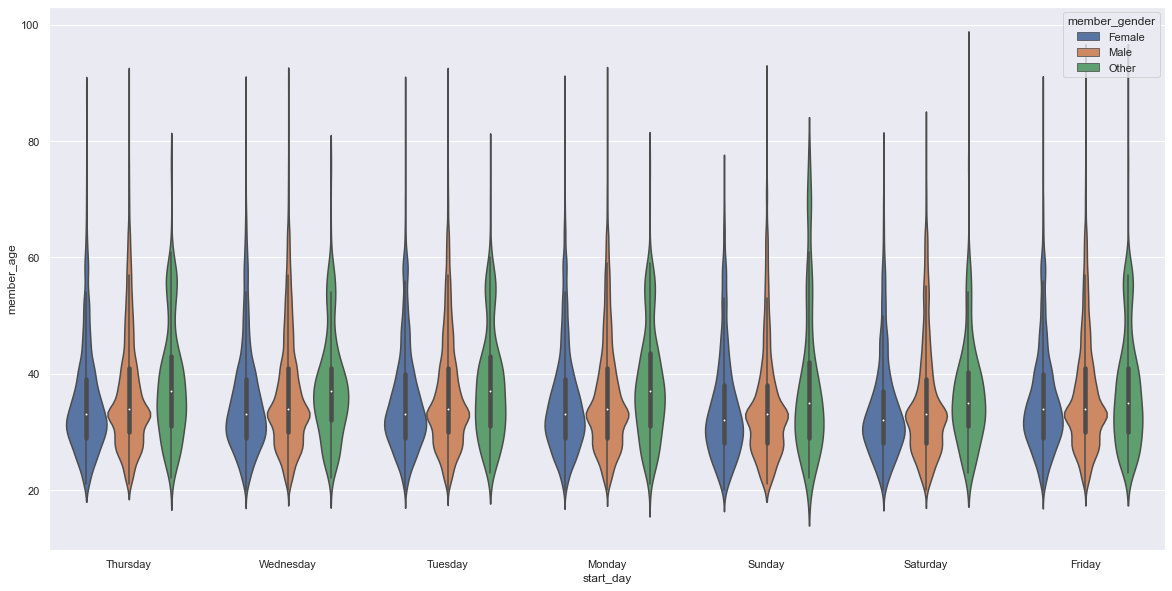

In [48]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=(20,10))
sn.violinplot(data=df, x='start_day', y='member_age', hue='member_gender')


"Other" gender have the largest median accross board.

#### Which gender have the most average trip duration among weekdays

<AxesSubplot:xlabel='start_day', ylabel='duration_min'>

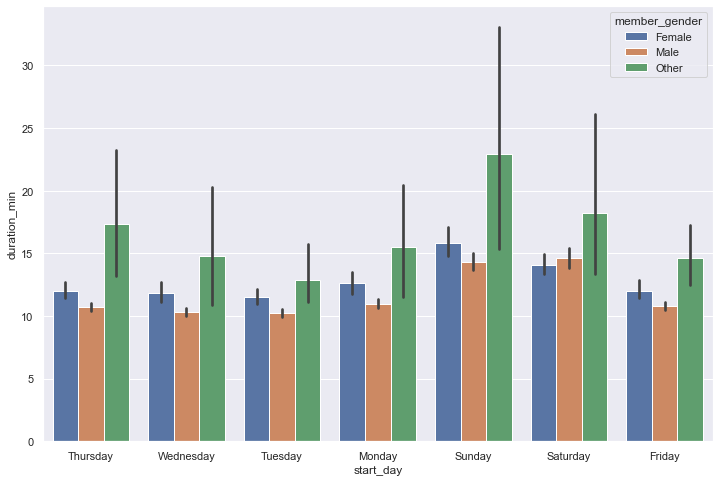

In [50]:
sn.set_theme(style='darkgrid')
plt.figure(figsize=(12,8))
sn.barplot(data=df, y='duration_min', x='start_day', hue='member_gender')

"Other" gender have the most average duration trip from Monday to Sunday. They have the highest duration on Sunday

#### Were there features that strengthened each other?

>- The "other" category seems to outnumber the males and females during the Weekdays. Also, most  rentals occurs on Sundays, followed by Saturday.

## Summary

* Bike rentals is prominent among subscribers rather than customers. This implies, subscribers gets discounts or special rates.

* Both subscribers and customers often go a short trip. It seems to be common in the area. 

* The "Other" gender, after the multivariate data analysis seems to be more active in bike rentals than males and females.



### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [51]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

/bin/bash: line 1: Part_II_Filename: No such file or directory


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
